In [45]:
import pandas as pd
import os

base_dir = os.getcwd()  # 현재 작업 디렉토리 기준으로 설정
data_dir = os.path.join(base_dir, 'data')
file_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'daily_average_price_volume_by_product_seoul.csv')

if not os.path.exists(file_path):
    raise FileNotFoundError(f"Data file not found at {file_path}")
df = pd.read_csv(file_path)

In [46]:
print(df.head())
print(df.info())

   품목          일자        총물량         평균단가  온도차(°C)  평균기온(°C)  일강수량(mm)  계절
0  감귤  2019-01-03  1797298.1  3241.550629     11.6      -3.5       0.0  겨울
1  감귤  2019-01-04  1356605.5  3241.630229     10.3      -1.1       0.0  겨울
2  감귤  2019-01-05  1306249.6  3246.549462      6.6      -2.8       0.0  겨울
3  감귤  2019-01-07  1519848.7  3280.563932      9.3      -1.9       0.0  겨울
4  감귤  2019-01-08  1282793.0  3092.842498      7.7      -3.5       0.0  겨울
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53244 entries, 0 to 53243
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   품목        53244 non-null  object 
 1   일자        53244 non-null  object 
 2   총물량       53244 non-null  float64
 3   평균단가      53244 non-null  float64
 4   온도차(°C)   53244 non-null  float64
 5   평균기온(°C)  53244 non-null  float64
 6   일강수량(mm)  53244 non-null  float64
 7   계절        53244 non-null  object 
dtypes: float64(5), object(3)
memory usage: 3.2+ MB


In [47]:
# 품목 고유값 확인
unique_products = df['품목'].unique()
print(unique_products)

['감귤' '감자' '고구마' '단감' '당근' '대파' '딸기' '마늘' '무' '바나나' '방울토마토' '배' '배추' '복숭아'
 '부추' '사과' '상추' '새송이' '수박' '시금치' '양배추' '양파' '얼갈이배추' '열무' '오이' '참외' '토마토'
 '포도' '풋고추' '호박']


In [48]:
# 한글 폰트 설정 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

In [49]:
# 일자 정렬
df['일자'] = pd.to_datetime(df['일자'])
df = df.sort_values(by='일자')
print(df.head())

        품목         일자        총물량         평균단가  온도차(°C)  평균기온(°C)  일강수량(mm)  계절
0       감귤 2019-01-03  1797298.1  3241.550629     11.6      -3.5       0.0  겨울
49577  풋고추 2019-01-03   192327.4  3615.311091     11.6      -3.5       0.0  겨울
47744   포도 2019-01-03   126541.6  4473.944539     11.6      -3.5       0.0  겨울
3663   고구마 2019-01-03   205456.6  2273.580657     11.6      -3.5       0.0  겨울
45911  토마토 2019-01-03   143090.8  2083.800265     11.6      -3.5       0.0  겨울


In [ ]:
# df['매출액'] = df['총물량'] * df['평균단가']  # 매출액 = 총물량 * 평균단가
# df['물량단가비율'] = df['총물량'] / df['평균단가']  # 물량 대비 단가 비율
# df['단가_변동성'] = df['평균단가'].pctchange().fillna(0)  # 단가 변동성 (일별 퍼센트 변화)
# df['물량변동성'] = df['총물량'].pct_change().fillna(0)  # 물량 변동성 (일별 퍼센트 변화)
# (총물량과 평균단가 변수도 포함)

In [8]:
# 총 물량과 평균 단가
# 매출액
# 물량 대비 단가 비율
# 단가 변동성
# 시계열 데이터 (총물량과 평균단가의 시계열)

# 클러스터링 알고리즘 (n_cluster=3~7)
# K-Means
# Gaussian Mixture Model
# Spectral Clustering
# DBSCAN
# Hierarchical Clustering
# Dynamic Time Warping 기반 K-Means

# 평가 지표
# Silhouette Score
# Davies-Bouldin Score
# DBScan 과 Hierarchical은 시각화만 포함
# 각 알고리즘 및 변수 조합에 대한 결과 시각화 저장
# 점수와 레이블 결과 csv 저장

In [50]:
df['매출액'] = df['총물량'] * df['평균단가']  # 매출액 = 총물량 * 평균단가
df['물량단가비율'] = df['총물량'] / df['평균단가']  # 물량 대비 단가 비율
df['단가_변동성'] = df['평균단가'].pct_change().fillna(0)  # 단가 변동성
df['물량변동성'] = df['총물량'].pct_change().fillna(0)  # 물량 변동성

print(df[['매출액', '물량단가비율', '단가_변동성', '물량변동성']].head())


                매출액      물량단가비율    단가_변동성     물량변동성
0      5.826033e+09  554.456279  0.000000  0.000000
49577  6.953234e+08   53.198022  0.115303 -0.892991
47744  5.661401e+08   28.284124  0.237499 -0.342051
3663   4.671222e+08   90.366972 -0.491817  0.623629
45911  2.981726e+08   68.668194 -0.083472 -0.303547


In [51]:
df.columns

Index(['품목', '일자', '총물량', '평균단가', '온도차(°C)', '평균기온(°C)', '일강수량(mm)', '계절',
       '매출액', '물량단가비율', '단가_변동성', '물량변동성'],
      dtype='object')

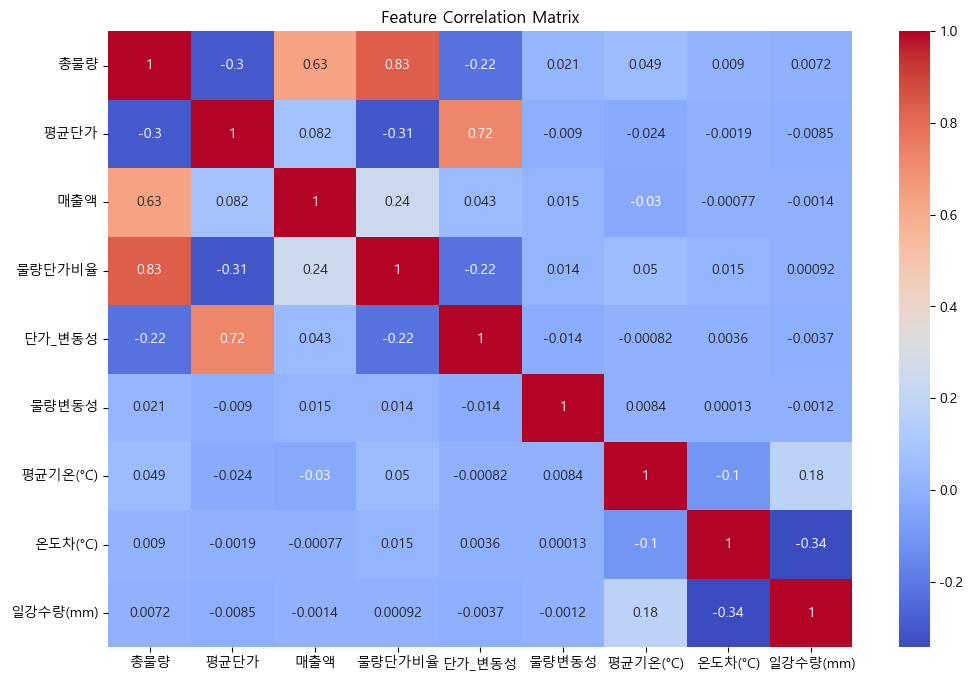

In [52]:
# 클러스터링에 사용할 변수 선정
selected_features = ['총물량', '평균단가', '매출액', '물량단가비율', '단가_변동성', '물량변동성', '평균기온(°C)', '온도차(°C)', '일강수량(mm)']
X = df[selected_features]

# 변수 상관관계 확인
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


# K-Means 클러스터링

In [53]:
# K-Means 클러스터링

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 클러스터링에 사용할 변수
features = ['총물량', '평균단가', '매출액', '물량단가비율', '단가_변동성', '물량변동성']
X = df[features]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 수 탐색
best_n_clusters = None
best_silhouette_score = -1
best_labels = None

print("Exploring different cluster counts...")
for n_clusters in range(3, 7):  # 클러스터 개수는 3~7까지 탐색
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    
    print(f"n_clusters={n_clusters}, Silhouette Score={silhouette_avg}, Davies-Bouldin Score={db_score}")
    
    # Silhouette Score 기준으로 최적의 클러스터 수 저장
    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg
        best_labels = labels  

print(f"\nBest number of clusters: {best_n_clusters}, Best Silhouette Score: {best_silhouette_score}")

# 최적의 클러스터링 결과를 데이터프레임에 추가
df['KMeans_Cluster'] = best_labels  


Exploring different cluster counts...
n_clusters=3, Silhouette Score=0.5640966632413605, Davies-Bouldin Score=0.9337470442733181
n_clusters=4, Silhouette Score=0.5634368659337693, Davies-Bouldin Score=0.7030523404100187
n_clusters=5, Silhouette Score=0.40517382147283215, Davies-Bouldin Score=0.8197008088833467
n_clusters=6, Silhouette Score=0.3738137944464252, Davies-Bouldin Score=0.8528096902442085

Best number of clusters: 3, Best Silhouette Score: 0.5640966632413605


In [54]:
df.columns

Index(['품목', '일자', '총물량', '평균단가', '온도차(°C)', '평균기온(°C)', '일강수량(mm)', '계절',
       '매출액', '물량단가비율', '단가_변동성', '물량변동성', 'KMeans_Cluster'],
      dtype='object')

In [55]:
print(df['KMeans_Cluster'].value_counts())


KMeans_Cluster
1    43230
2     7499
0     2515
Name: count, dtype: int64


In [ ]:
# 1이 대부분이라 분포가 불균형

In [56]:
print(df['KMeans_Cluster'].unique())  # 클러스터 라벨 확인

[2 1 0]


In [57]:
df['KMeans_Cluster'] = best_labels

In [58]:
# 각 클러스터에 포함된 품목 리스트 출력
for cluster_id in sorted(df['KMeans_Cluster'].unique()):
    items_in_cluster = df[df['KMeans_Cluster'] == cluster_id]['품목'].unique()
    print(f"Cluster {cluster_id} contains: {', '.join(items_in_cluster)}")


Cluster 0 contains: 딸기, 참외, 풋고추, 부추, 방울토마토, 포도, 토마토, 감귤, 새송이, 마늘, 복숭아, 시금치, 배, 상추, 사과, 단감, 대파, 고구마, 수박, 오이, 감자
Cluster 1 contains: 풋고추, 포도, 고구마, 토마토, 단감, 참외, 당근, 오이, 열무, 얼갈이배추, 마늘, 시금치, 수박, 새송이, 상추, 방울토마토, 부추, 배, 호박, 딸기, 바나나, 감자, 사과, 양배추, 대파, 배추, 무, 복숭아, 양파, 감귤
Cluster 2 contains: 감귤, 대파, 양파, 양배추, 무, 바나나, 사과, 감자, 배추, 딸기, 배, 오이, 호박, 수박, 참외, 마늘, 복숭아, 포도, 단감, 부추


In [59]:
strawberry_clusters = df[df['품목'] == '딸기']['KMeans_Cluster'].value_counts()
print(strawberry_clusters)


KMeans_Cluster
0    1079
1     454
2     158
Name: count, dtype: int64


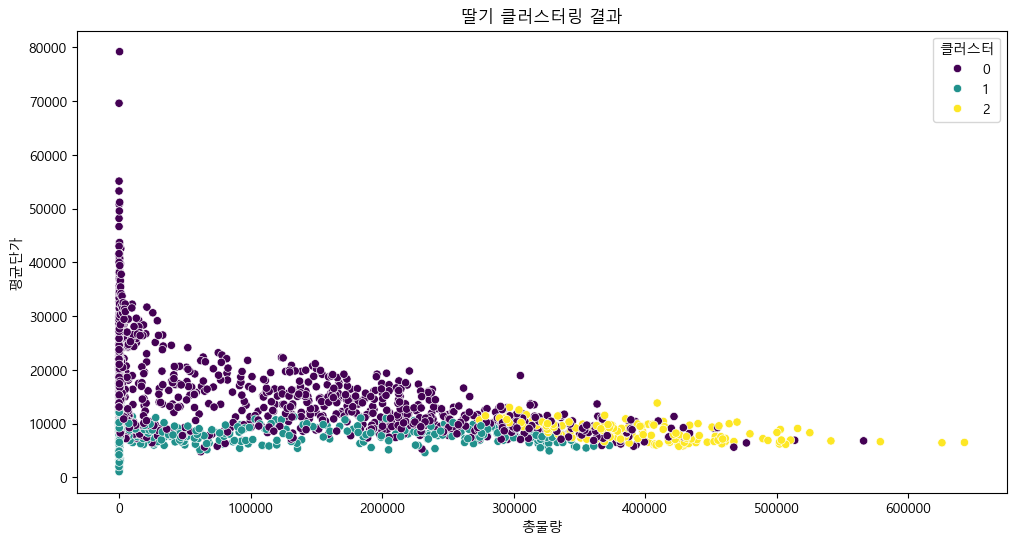

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클러스터별 총물량과 평균단가 분포
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['품목'] == '딸기'], x='총물량', y='평균단가', hue='KMeans_Cluster', palette='viridis')
plt.title('딸기 클러스터링 결과')
plt.xlabel('총물량')
plt.ylabel('평균단가')
plt.legend(title='클러스터')
plt.show()


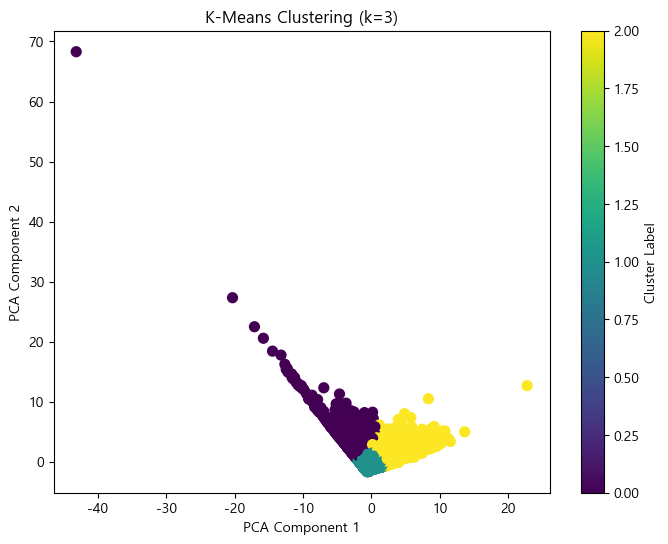

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 2차원 데이터로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', s=50)
plt.colorbar(scatter, label="Cluster Label")
plt.title(f"K-Means Clustering (k={best_n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [62]:
# 클러스터별 품목과 해당 데이터 개수 출력
for cluster_id in sorted(df['KMeans_Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    items_count = df[df['KMeans_Cluster'] == cluster_id]['품목'].value_counts()
    print(items_count)



Cluster 0:
품목
딸기       1079
포도        342
복숭아       259
부추        247
감귤         96
시금치        88
풋고추        77
상추         75
방울토마토      65
참외         54
마늘         54
배          31
단감         17
사과         10
토마토         7
오이          6
대파          4
새송이         1
고구마         1
수박          1
감자          1
Name: count, dtype: int64

Cluster 1:
품목
열무       1833
얼갈이배추    1833
새송이      1832
당근       1832
고구마      1829
토마토      1826
바나나      1822
호박       1812
마늘       1777
방울토마토    1768
상추       1758
풋고추      1757
시금치      1745
대파       1736
사과       1712
배        1686
감자       1677
부추       1583
양배추      1569
참외       1481
수박       1388
오이       1325
포도       1300
감귤       1228
단감       1191
배추        769
복숭아       484
딸기        454
무         180
양파         43
Name: count, dtype: int64

Cluster 2:
품목
양파     1790
무      1653
배추     1064
감귤      509
오이      502
수박      442
복숭아     265
양배추     263
포도      191
딸기      158
감자      152
참외      145
배       111
사과      111
대파       93
호박       

In [63]:
df.columns

Index(['품목', '일자', '총물량', '평균단가', '온도차(°C)', '평균기온(°C)', '일강수량(mm)', '계절',
       '매출액', '물량단가비율', '단가_변동성', '물량변동성', 'KMeans_Cluster'],
      dtype='object')

# Gaussian Mixture Model

In [64]:
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

# GMM 클러스터링
best_n_clusters = None
best_combined_score = -1

print("Exploring different cluster counts...")
for n_clusters in range(3, 7):  # 클러스터 개수는 3~7까지 탐색
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, gmm_labels)
    db_score = davies_bouldin_score(X_scaled, gmm_labels)
    combined_score = silhouette_avg / db_score  
    
    print(f"GMM - n_clusters={n_clusters}, Silhouette Score={silhouette_avg}, Davies-Bouldin Score={db_score}, Combined Score={combined_score}")
    
    # 최적의 클러스터 수 저장 (Combined Score 기준)
    if combined_score > best_combined_score:
        best_n_clusters = n_clusters
        best_combined_score = combined_score
        best_labels = gmm_labels  # 최적의 레이블 저장

print(f"\nBest number of clusters: {best_n_clusters}, Best Combined Score: {best_combined_score}")

# 최적의 클러스터링 결과를 데이터프레임에 추가
df['GMM_Cluster'] = best_labels  

Exploring different cluster counts...
GMM - n_clusters=3, Silhouette Score=0.20340171677143723, Davies-Bouldin Score=1.659387829439016, Combined Score=0.12257635807790672
GMM - n_clusters=4, Silhouette Score=0.20553008944367848, Davies-Bouldin Score=1.1994969252479861, Combined Score=0.17134690812249212
GMM - n_clusters=5, Silhouette Score=0.0983114934650069, Davies-Bouldin Score=1.5037122020088358, Combined Score=0.06537919512368845
GMM - n_clusters=6, Silhouette Score=0.05456452357523847, Davies-Bouldin Score=1.4837822088744472, Combined Score=0.03677394380987321

Best number of clusters: 4, Best Combined Score: 0.17134690812249212


In [65]:
df.columns

Index(['품목', '일자', '총물량', '평균단가', '온도차(°C)', '평균기온(°C)', '일강수량(mm)', '계절',
       '매출액', '물량단가비율', '단가_변동성', '물량변동성', 'KMeans_Cluster', 'GMM_Cluster'],
      dtype='object')

In [66]:
print(df['GMM_Cluster'].value_counts())

print(df['GMM_Cluster'].unique()) 

GMM_Cluster
1    28579
0    18407
2     6257
3        1
Name: count, dtype: int64
[2 0 1 3]


In [ ]:
# Cluster 3에 데이터가 1개만 포함

In [67]:
# 각 클러스터에 포함된 품목 리스트 출력
for cluster_id in sorted(df['GMM_Cluster'].unique()):
    items_in_cluster = df[df['GMM_Cluster'] == cluster_id]['품목'].unique()
    print(f"Cluster {cluster_id} contains: {', '.join(items_in_cluster)}")

strawberry_clusters = df[df['품목'] == '딸기']['GMM_Cluster'].value_counts()
print(strawberry_clusters)

Cluster 0 contains: 풋고추, 포도, 참외, 딸기, 마늘, 수박, 방울토마토, 부추, 배, 토마토, 단감, 복숭아, 새송이, 사과, 오이, 시금치, 감귤, 고구마, 상추, 무, 당근, 바나나, 호박, 배추, 대파, 열무, 감자, 양배추, 얼갈이배추, 양파
Cluster 1 contains: 고구마, 토마토, 단감, 오이, 열무, 대파, 얼갈이배추, 시금치, 무, 새송이, 바나나, 상추, 배, 감자, 호박, 배추, 당근, 사과, 수박, 양파, 양배추, 감귤, 풋고추, 부추, 참외, 포도, 마늘, 방울토마토, 복숭아, 딸기
Cluster 2 contains: 감귤, 당근, 양파, 양배추, 사과, 배추, 무, 얼갈이배추, 토마토, 시금치, 호박, 방울토마토, 배, 단감, 딸기, 바나나, 부추, 대파, 감자, 마늘, 포도, 고구마, 열무, 참외, 오이, 풋고추, 수박, 상추, 복숭아, 새송이
Cluster 3 contains: 감귤
GMM_Cluster
0    1639
2      48
1       4
Name: count, dtype: int64


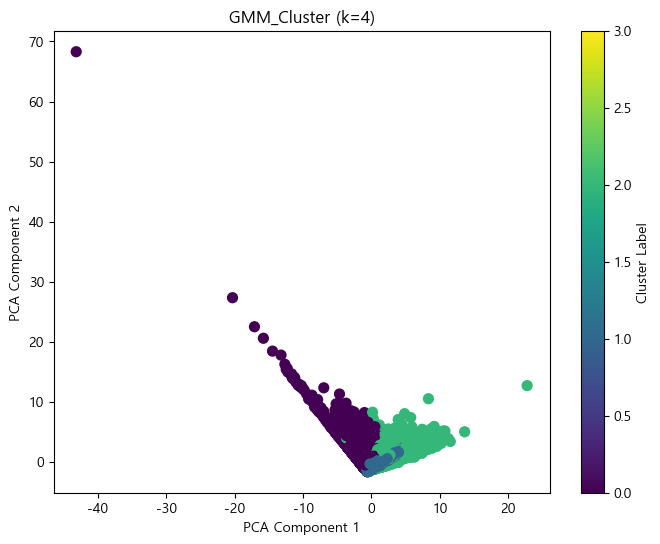

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 2차원 데이터로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', s=50)
plt.colorbar(scatter, label="Cluster Label")
plt.title(f"GMM_Cluster (k={best_n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# Spectral Clustering

In [69]:
# Spectral Clustering

from sklearn.cluster import SpectralClustering

best_n_clusters = None
best_silhouette_score = -1
best_labels = None

print("Exploring different cluster counts...")
for n_clusters in range(3, 7):  # 클러스터 개수는 3~7까지 탐색
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')
    spectral_labels = spectral.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, spectral_labels)
    db_score = davies_bouldin_score(X_scaled, spectral_labels)
    
    print(f"Spectral - n_clusters={n_clusters}, Silhouette Score={silhouette_avg}, Davies-Bouldin Score={db_score}")
    
    # Silhouette Score 기준으로 최적의 클러스터 수 저장
    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg
        best_labels = spectral_labels

print(f"\nBest number of clusters: {best_n_clusters}, Best Silhouette Score: {best_silhouette_score}")

# 최적의 클러스터링 결과를 데이터프레임에 추가
df['Spectral_Cluster'] = best_labels
print(df[['품목', 'Spectral_Cluster']].head())

Exploring different cluster counts...
Spectral - n_clusters=3, Silhouette Score=0.3083588490389591, Davies-Bouldin Score=1.197412178660968
Spectral - n_clusters=4, Silhouette Score=0.19419459321301702, Davies-Bouldin Score=1.1868523037431384
Spectral - n_clusters=5, Silhouette Score=0.20711583787241644, Davies-Bouldin Score=1.3321753633753857
Spectral - n_clusters=6, Silhouette Score=0.18264565985213074, Davies-Bouldin Score=1.1080903351241298

Best number of clusters: 3, Best Silhouette Score: 0.3083588490389591
        품목  Spectral_Cluster
0       감귤                 0
49577  풋고추                 1
47744   포도                 2
3663   고구마                 1
45911  토마토                 1


In [70]:
df.columns

Index(['품목', '일자', '총물량', '평균단가', '온도차(°C)', '평균기온(°C)', '일강수량(mm)', '계절',
       '매출액', '물량단가비율', '단가_변동성', '물량변동성', 'KMeans_Cluster', 'GMM_Cluster',
       'Spectral_Cluster'],
      dtype='object')

In [71]:
print(df['Spectral_Cluster'].value_counts())

print(df['Spectral_Cluster'].unique()) 

Spectral_Cluster
1    28272
2    16104
0     8868
Name: count, dtype: int64
[0 1 2]


In [72]:
# 각 클러스터에 포함된 품목 리스트 출력
for cluster_id in sorted(df['Spectral_Cluster'].unique()):
    items_in_cluster = df[df['Spectral_Cluster'] == cluster_id]['품목'].unique()
    print(f"Cluster {cluster_id} contains: {', '.join(items_in_cluster)}")

Cluster 0 contains: 감귤, 대파, 양파, 양배추, 무, 바나나, 사과, 감자, 배추, 당근, 배, 오이, 호박, 풋고추, 수박, 참외, 마늘, 복숭아, 얼갈이배추, 토마토, 방울토마토, 상추, 포도, 단감, 열무, 부추, 고구마
Cluster 1 contains: 풋고추, 고구마, 토마토, 단감, 당근, 오이, 열무, 얼갈이배추, 시금치, 새송이, 상추, 배, 호박, 바나나, 감자, 수박, 사과, 배추, 방울토마토, 마늘, 대파, 양배추, 양파, 무, 포도, 부추, 감귤, 참외, 복숭아, 딸기
Cluster 2 contains: 포도, 참외, 딸기, 마늘, 수박, 방울토마토, 부추, 풋고추, 단감, 토마토, 배, 오이, 바나나, 호박, 감귤, 고구마, 새송이, 사과, 복숭아, 시금치, 감자, 상추, 무, 배추, 열무, 얼갈이배추, 대파, 양파, 당근


In [73]:
strawberry_clusters = df[df['품목'] == '딸기']['Spectral_Cluster'].value_counts()
print(strawberry_clusters)

Spectral_Cluster
2    1677
1      14
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 데이터 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Spectral Clustering 결과 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Spectral_Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title('Spectral Clustering Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(alpha=0.3)
plt.show()


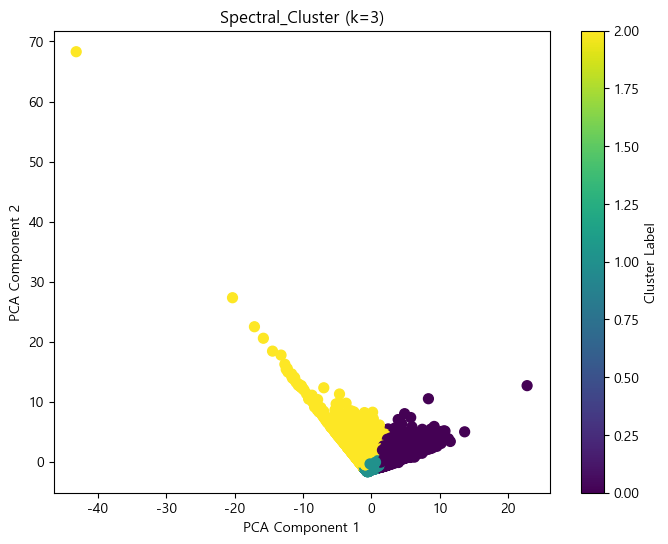

In [74]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 2차원 데이터로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', s=50)
plt.colorbar(scatter, label="Cluster Label")
plt.title(f"Spectral_Cluster (k={best_n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [75]:
# DBSCAN
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링
dbscan_results = []  # 결과 저장용 리스트

for eps in [0.5, 1.0, 1.5]:  # 다양한 eps 값 테스트
    dbscan = DBSCAN(eps=eps, min_samples=5)
    db_labels = dbscan.fit_predict(X_scaled)

    # 노이즈 비율 계산
    n_noise = sum(db_labels == -1)
    n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)

    if n_clusters > 1:  # 클러스터가 2개 이상이어야 Silhouette Score 계산 가능
        silhouette_avg = silhouette_score(X_scaled, db_labels)
        noise_ratio = n_noise / len(db_labels)

        print(f"DBSCAN - eps={eps}, Silhouette Score={silhouette_avg}, Noise Ratio={noise_ratio:.2f}")

        # 결과 저장
        dbscan_results.append({
            'eps': eps,
            'n_clusters': n_clusters,
            'Silhouette_Score': silhouette_avg,
            'Noise_Ratio': noise_ratio
        })
    else:
        print(f"DBSCAN - eps={eps}: Not enough clusters for evaluation (Clusters={n_clusters}, Noise Ratio={n_noise / len(db_labels):.2f})")

# 최적 eps 선택 및 결과 저장
if dbscan_results:
    best_result = max(dbscan_results, key=lambda x: x['Silhouette_Score'])
    df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
    print("\nBest DBSCAN Result:")
    print(best_result)


DBSCAN - eps=0.5, Silhouette Score=0.26375589732935656, Noise Ratio=0.01
DBSCAN - eps=1.0, Silhouette Score=0.6613329942507866, Noise Ratio=0.00
DBSCAN - eps=1.5, Silhouette Score=0.7580306041107469, Noise Ratio=0.00

Best DBSCAN Result:
{'eps': 1.5, 'n_clusters': 3, 'Silhouette_Score': np.float64(0.7580306041107469), 'Noise_Ratio': np.float64(0.0017842385996544212)}


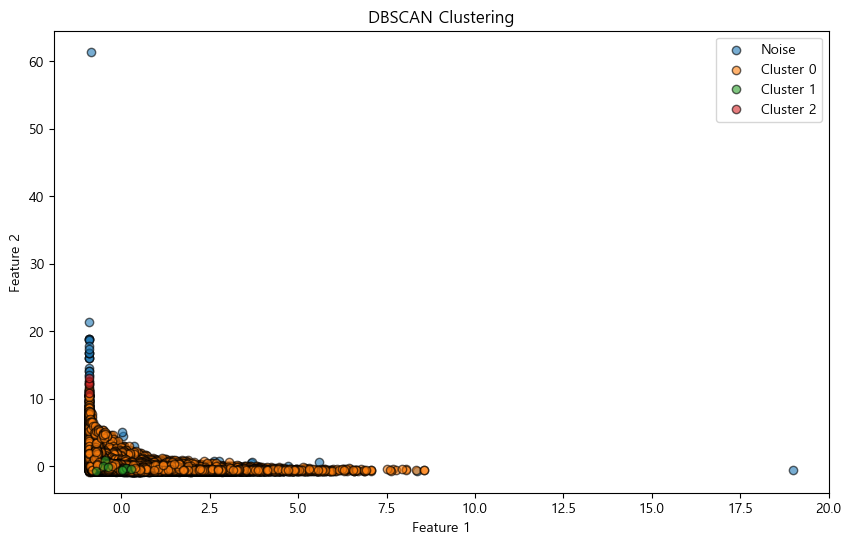

In [76]:
import numpy as np

plt.figure(figsize=(10, 6))
unique_labels = np.unique(df['DBSCAN_Cluster'])
for label in unique_labels:
    if label == -1:
        color = 'black'  # 노이즈 데이터
        label_name = 'Noise'
    else:
        color = plt.cm.tab10(label / max(unique_labels))
        label_name = f'Cluster {label}'
    plt.scatter(X_scaled[df['DBSCAN_Cluster'] == label, 0],
                X_scaled[df['DBSCAN_Cluster'] == label, 1],
                label=label_name, alpha=0.6, edgecolors='k')

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [77]:
df.columns

Index(['품목', '일자', '총물량', '평균단가', '온도차(°C)', '평균기온(°C)', '일강수량(mm)', '계절',
       '매출액', '물량단가비율', '단가_변동성', '물량변동성', 'KMeans_Cluster', 'GMM_Cluster',
       'Spectral_Cluster', 'DBSCAN_Cluster'],
      dtype='object')

In [78]:
print(df['DBSCAN_Cluster'].value_counts())

print(df['DBSCAN_Cluster'].unique()) 

DBSCAN_Cluster
 0    53134
-1       95
 1       10
 2        5
Name: count, dtype: int64
[-1  0  1  2]


In [ ]:
# 95개 데이터가 노이즈로 분류됨
# 대부분의 데이터가 Cluster 0에 몰려 있으므로 DBSCAN이 클러스터를 제대로 형성하지 못한 듯

In [79]:
# 각 클러스터에 포함된 품목 리스트 출력
for cluster_id in sorted(df['DBSCAN_Cluster'].unique()):
    items_in_cluster = df[df['DBSCAN_Cluster'] == cluster_id]['품목'].unique()
    print(f"Cluster {cluster_id} contains: {', '.join(items_in_cluster)}")

Cluster -1 contains: 감귤, 복숭아, 양파, 포도, 바나나, 무, 배, 풋고추, 양배추, 배추, 딸기, 열무, 오이, 마늘, 얼갈이배추, 감자, 대파
Cluster 0 contains: 풋고추, 포도, 고구마, 토마토, 단감, 참외, 당근, 오이, 열무, 대파, 얼갈이배추, 딸기, 양파, 양배추, 마늘, 시금치, 무, 수박, 새송이, 바나나, 상추, 방울토마토, 사과, 부추, 배, 감자, 호박, 배추, 감귤, 복숭아
Cluster 1 contains: 참외, 얼갈이배추, 풋고추, 호박, 고구마, 상추, 오이, 양배추, 바나나
Cluster 2 contains: 딸기, 복숭아


In [80]:
strawberry_clusters = df[df['품목'] == '딸기']['DBSCAN_Cluster'].value_counts()
print(strawberry_clusters)

DBSCAN_Cluster
 0    1658
-1      30
 2       3
Name: count, dtype: int64


# Hierarchical Clustering

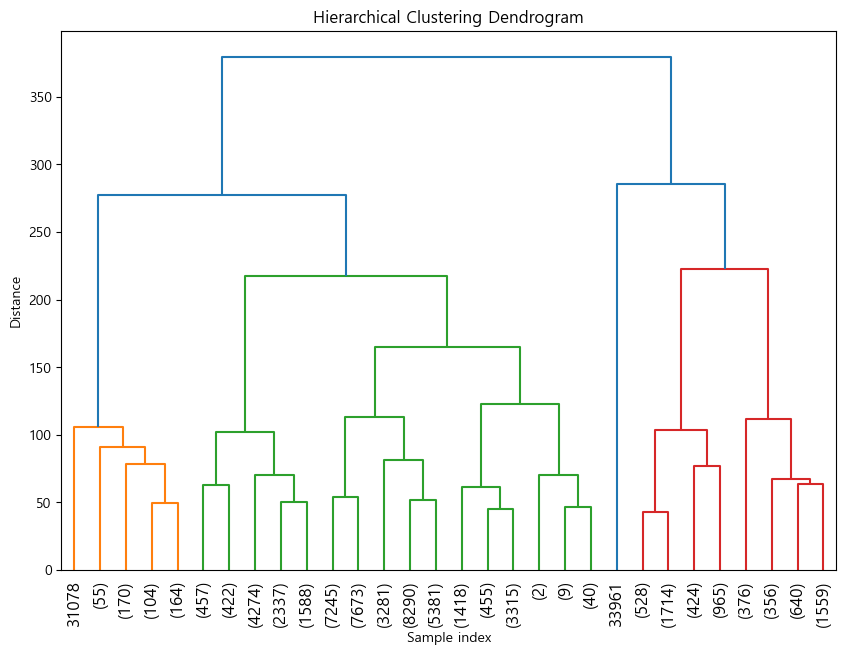

In [27]:
# Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 계층적 클러스터링 수행
linked = linkage(X_scaled, method='ward')

# 덴드로그램
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [29]:
!pip install tslearn

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.7 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   --- ------------------------------------ 2.4/28.1 MB 12.2 MB/s eta 0:00:03
   ------- -------------------------------- 5.0/28.1 MB 12.1 MB/s eta 0:00:02
   ---------- ----------------------------- 7.3/28.1 MB 11.9 MB/s eta 0:00:02
   ------------- -------------------------- 9.7/28.1 MB 11.8 MB/s eta 0:00:02
   ----------------- ---------------------- 12.3/28.1 MB 11.9 MB/s eta 0:00:02
   -------------------- ------------------- 14.7/28.1 MB 11.8 MB/s eta 0:00:02
   ------------------------ --------------- 17.3/28.1 MB 11.7 MB/s eta 0:00:01
   --------------------------- ------------ 19.7/28.1 MB 11.8 MB/s eta 0:00:01
   ------------------------------- -------- 22.3/28.1 MB 11.7 MB/s eta 0:00:01


In [30]:
pip show tslearn

Name: tslearnNote: you may need to restart the kernel to use updated packages.

Version: 0.6.3
Summary: A machine learning toolkit dedicated to time-series data
Home-page: http://tslearn.readthedocs.io/
Author: Romain Tavenard
Author-email: romain.tavenard@univ-rennes2.fr
License: BSD-2-Clause
Location: c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages
Requires: joblib, numba, numpy, scikit-learn, scipy
Required-by: 


In [82]:
# Dynamic Time Warping 기반 K-Means

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 시계열 데이터 스케일링
X_scaled_ts = TimeSeriesScalerMeanVariance().fit_transform(X_scaled.reshape(-1, 1, X_scaled.shape[1]))

# 클러스터 수 탐색
best_n_clusters = None
best_combined_score = -1
best_labels = None

print("Exploring different cluster counts...")
for n_clusters in range(3, 8):
    dtw_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
    dtw_labels = dtw_kmeans.fit_predict(X_scaled_ts)
    
    # 클러스터 개수 확인
    n_labels = len(set(dtw_labels))
    if n_labels <= 1:
        print(f"DTW K-Means - n_clusters={n_clusters}: Only {n_labels} unique label(s). Skipping...")
        continue
    
    # 평가 지표 계산
    silhouette_avg = silhouette_score(X_scaled, dtw_labels)
    db_score = davies_bouldin_score(X_scaled, dtw_labels)
    ch_score = calinski_harabasz_score(X_scaled, dtw_labels)
    combined_score = silhouette_avg / db_score  # Silhouette Score와 Davies-Bouldin Score를 조합한 점수
    
    print(f"DTW K-Means - n_clusters={n_clusters}, Silhouette Score={silhouette_avg}, Davies-Bouldin Score={db_score}, Calinski-Harabasz Score={ch_score}")
    
    # 최적의 클러스터 수 저장
    if combined_score > best_combined_score:
        best_n_clusters = n_clusters
        best_combined_score = combined_score
        best_labels = dtw_labels

if best_labels is not None:
    print(f"\nBest number of clusters: {best_n_clusters}, Best Combined Score: {best_combined_score}")
    # 최적의 클러스터링 결과를 데이터프레임에 추가
    df['DTW_KMeans_Cluster'] = best_labels
else:
    print("No valid clusters were found.")


c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The TimeSeriesScalerMeanVariance or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Exploring different cluster counts...


c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


DTW K-Means - n_clusters=3: Only 1 unique label(s). Skipping...


c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


DTW K-Means - n_clusters=4: Only 1 unique label(s). Skipping...


c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


DTW K-Means - n_clusters=5: Only 1 unique label(s). Skipping...


c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


DTW K-Means - n_clusters=6: Only 1 unique label(s). Skipping...


c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\carpe\Anaconda3\envs\cv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


DTW K-Means - n_clusters=7: Only 1 unique label(s). Skipping...
No valid clusters were found.


In [83]:
df.columns

Index(['품목', '일자', '총물량', '평균단가', '온도차(°C)', '평균기온(°C)', '일강수량(mm)', '계절',
       '매출액', '물량단가비율', '단가_변동성', '물량변동성', 'KMeans_Cluster', 'GMM_Cluster',
       'Spectral_Cluster', 'DBSCAN_Cluster'],
      dtype='object')

1. 클러스터링에 사용한 변수
features = ['총물량', '평균단가', '매출액', '물량단가비율', '단가_변동성', '물량변동성']  


2. K-Means 클러스터링[KMeans_Cluster]
n_clusters=3, Silhouette Score=0.5640966632413605, Davies-Bouldin Score=0.9337470442733181
n_clusters=4, Silhouette Score=0.5634368659337693, Davies-Bouldin Score=0.7030523404100187
n_clusters=5, Silhouette Score=0.40517382147283215, Davies-Bouldin Score=0.8197008088833467
n_clusters=6, Silhouette Score=0.3738137944464252, Davies-Bouldin Score=0.8528096902442085

Best number of clusters: 3, Best Silhouette Score: 0.5640966632413605


3. Gaussian Mixture Model[GMM_Cluster]
GMM - n_clusters=3, Silhouette Score=0.20340171677143723, Davies-Bouldin Score=1.659387829439016, Combined Score=0.12257635807790672
GMM - n_clusters=4, Silhouette Score=0.20553008944367848, Davies-Bouldin Score=1.1994969252479861, Combined Score=0.17134690812249212
GMM - n_clusters=5, Silhouette Score=0.0983114934650069, Davies-Bouldin Score=1.5037122020088358, Combined Score=0.06537919512368845
GMM - n_clusters=6, Silhouette Score=0.05456452357523847, Davies-Bouldin Score=1.4837822088744472, Combined Score=0.03677394380987321

Best number of clusters: 4, Best Combined Score: 0.17134690812249212



4. Spectral Clustering[Spectral_Cluster]
Spectral - n_clusters=3, Silhouette Score=0.3083588490389591, Davies-Bouldin Score=1.197412178660968
Spectral - n_clusters=4, Silhouette Score=0.19419459321301702, Davies-Bouldin Score=1.1868523037431384
Spectral - n_clusters=5, Silhouette Score=0.20711583787241644, Davies-Bouldin Score=1.3321753633753857
Spectral - n_clusters=6, Silhouette Score=0.18264565985213074, Davies-Bouldin Score=1.1080903351241298

Best number of clusters: 3, Best Silhouette Score: 0.3083588490389591
    

5. DBSCAN[DBSCAN_Cluster]
DBSCAN - eps=0.5, Silhouette Score=0.26375589732935656, Noise Ratio=0.01
DBSCAN - eps=1.0, Silhouette Score=0.6613329942507866, Noise Ratio=0.00
DBSCAN - eps=1.5, Silhouette Score=0.7580306041107469, Noise Ratio=0.00

Best DBSCAN Result:
{'eps': 1.5, 'n_clusters': 3, 'Silhouette_Score': np.float64(0.7580306041107469), 'Noise_Ratio': np.float64(0.0017842385996544212)}


6. Dynamic Time Warping 기반 K-Means[DTW_KMeans_Cluster]

In [32]:
df.columns

Index(['품목', '일자', '총물량', '평균단가', '온도차(°C)', '평균기온(°C)', '일강수량(mm)', '계절',
       '매출액', '물량단가비율', '단가_변동성', '물량변동성', '클러스터'],
      dtype='object')

In [84]:
output_file_path = '../data/clustered_data.csv'  

df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"저장성공: {output_file_path}")


저장성공: ../data/clustered_data.csv
